<a href="https://colab.research.google.com/github/yonaka0623/my_learning_record/blob/main/Simple_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

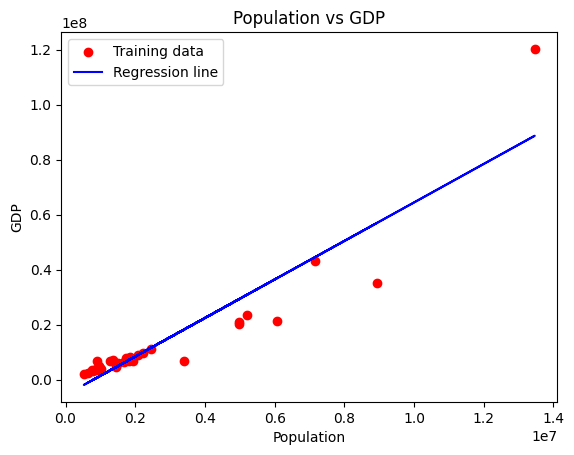

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# データ読み込み
df = pd.read_csv("pref_population_gdp.csv")

# 特徴量と目的変数
X = df.iloc[:, 1:2].values  # Population
y = df.iloc[:, 2].values    # GDP

# 欠損値を中央値で補完（2Dに変形して処理）
imputer = SimpleImputer(strategy='median')
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=0
)

# 線形回帰モデル
reg = LinearRegression()
reg.fit(X_train, y_train)

# 可視化
plt.scatter(X_train, y_train, color='red', label="Training data")
plt.plot(X_train, reg.predict(X_train), color='blue', label="Regression line")
plt.title('Population vs GDP')
plt.xlabel('Population')
plt.ylabel('GDP')
plt.legend()
plt.show()
